End.


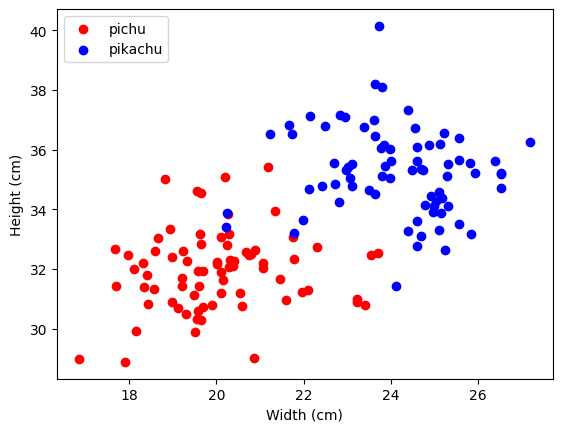

In [12]:
import matplotlib.pyplot as plt
import json
#from matplotlib.lines import Line2D

def read_data_points():
    '''Returns a list with an item for each pokemon measured. 
    Each item is a dictionary with keys "width", "height" & "label".'''

    data_points_path = "./datapoints.txt"

    with open(data_points_path) as file:
        lines = file.readlines()

    # Manage file contents outside with statement above in order to 
    # close the file asap.

    # remove "\n" at end of each line:
    lines = [line.rstrip() for line in lines]
    # remove first line (header):
    lines = lines[1:]

    pichus = []
    pikachus = []

    # interpret data in each line as a measurement
    for line in lines:
        line_data = line.split(", ")
        width = float(line_data[0])
        height = float(line_data[1])
        label = int(line_data[2])
        measurement = {
            "width": width,
            "height": height
        }
        if label == 0:
            pichus.append(measurement)
        elif label == 1:
            pikachus.append(measurement)
        
    return {"pichu": pichus, "pikachu": pikachus}

def plot_data_points(data_points):
    # plot all the points of one pokemon at a time:
    for pokemon, measurements in data_points.items():

        # make and fill two corresponding lists with x values (measured_widths)
        # and y values (measured_heights) 
        measured_widths = []
        measured_heights = []
        for measurement in measurements:
            measured_widths.append(measurement["width"])
            measured_heights.append(measurement["height"])
        
        if pokemon == "pichu":
            point_color = "red"
        else:
            point_color = "blue"

        plt.scatter(
            x = measured_widths,
            y = measured_heights,
            c = point_color,
            label = pokemon
        )

    # Explain axis values with labels:
    plt.xlabel("Width (cm)")
    plt.ylabel("Height (cm)")

    # show a legend in upper left corner that explains 
    # which pokemon each color represents
    plt.legend(loc="upper left")

    # Not sure what the point of this method is...
    #plt.show()

data_points = read_data_points()
#serialized_data_points = json.dumps(data_points, indent=4)
#print(serialized_data_points)
#print(f"{data_points = }")

plot_data_points(data_points)

#print(f"{len(measurements)} pokemons have been measured.")

print("End.")